XYZ Company has offices in four different zones. The company wishes to investigate the following :
Help the company to carry out their study with the help of data provided.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

### Read the Dataset to Python environment

In [2]:
df=pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


### Analyse the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [4]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


### 1. The mean sales generated by each zone.

In [5]:
df.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

### 2. Total sales generated by all the zones for each month.

In [13]:
df['Total Sales']= df.sum(axis=1)
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,21067632
1,Month - 2,1238428,1707421,2212113,1994341,21456909
2,Month - 3,1860771,2091194,1282374,1241600,19427817
3,Month - 4,1871571,1759617,2290580,2252681,24523347
4,Month - 5,1244922,1606010,1818334,1326062,17985984


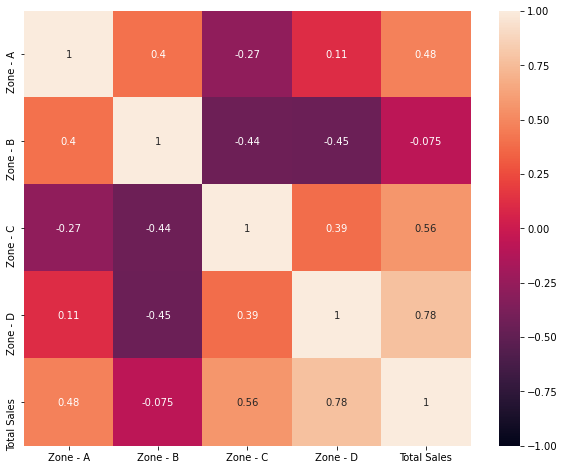

In [15]:
# Identify the correlation and display using the heatmap
corr = df.corr()
plt.subplots(figsize = (10,8))
sns.heatmap(corr,vmin = -1, vmax = 1, annot=True);

Zone-D is highly correlated with Total Sales and Zone-B is least correlated with Total Sales.

### 3. Check whether all the zones generate the same amount of sales.

Null Hypoythesis Ho: All zones generate same amount of sales.

Alternate Hypothesis H1: All zones generate different amount of sales. 

Confidence interval is 95%

In [8]:
F,p = stat.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])

In [9]:
print(" F-statistic is {0} \n p-value is {1}".format(F,p))

 F-statistic is 5.672056106843581 
 p-value is 0.0011827601694503335


In [10]:
if p<0.05:
    print("Reject null hypothesis, which indicates All zones generate different amount of sales.")
else:
    print("Accept null hypothesis, which indicates All zones generate same amount of sales.") 

Reject null hypothesis, which indicates All zones generate different amount of sales.
